In [3]:
import numpy as np
import os
import datetime
import pandas as pd
import random
# from tqdm import tqdm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import preprocessing
from sklearn import datasets

In [1]:
import cv2

In [2]:
cv2.__version__

'3.3.1'

### Loading Images

https://github.com/chrisalbon/sim_data

In [4]:
plane_path = r"sim_data-master\images\plane.jpg"
my_img = cv2.imread(plane_path, cv2.IMREAD_GRAYSCALE)

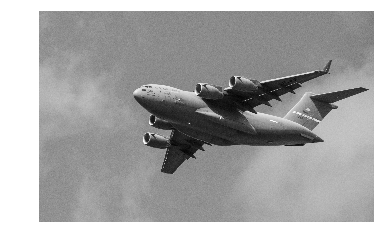

In [5]:
# Gray Scale value 0 - black to 255 - white
plt.imshow(my_img, cmap="gray")
plt.axis("off")
plt.show()

In [9]:
type(my_img), my_img, my_img.shape

(numpy.ndarray, array([[140, 136, 146, ..., 132, 139, 134],
        [144, 136, 149, ..., 142, 124, 126],
        [152, 139, 144, ..., 121, 127, 134],
        ...,
        [156, 146, 144, ..., 157, 154, 151],
        [146, 150, 147, ..., 156, 158, 157],
        [143, 138, 147, ..., 156, 157, 157]], dtype=uint8), (2270, 3600))

In [10]:
# By Default Blue, Green, Red
my_imgC = cv2.imread(plane_path, cv2.IMREAD_COLOR)

In [13]:
# Can convert from BGR to RGB
image_rgb = cv2.cvtColor(my_imgC, cv2.COLOR_BGR2RGB)

In [12]:
my_imgC.shape, my_imgC[0][0]

((2270, 3600, 3), array([195, 144, 111], dtype=uint8))

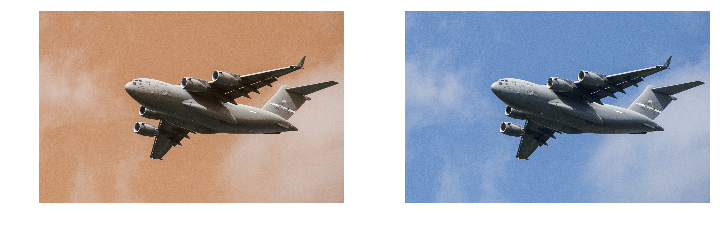

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(my_imgC)
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(image_rgb)
plt.show()

- Save an image: cv2.imwrite(< path >, < image >)
- Will overwrite existing

### Resizing & Cropping

In [18]:
plane_path = r"sim_data-master\images\plane_256x256.jpg"
my_img = cv2.imread(plane_path, cv2.IMREAD_GRAYSCALE)
small_img = cv2.resize(my_img, (50, 50))

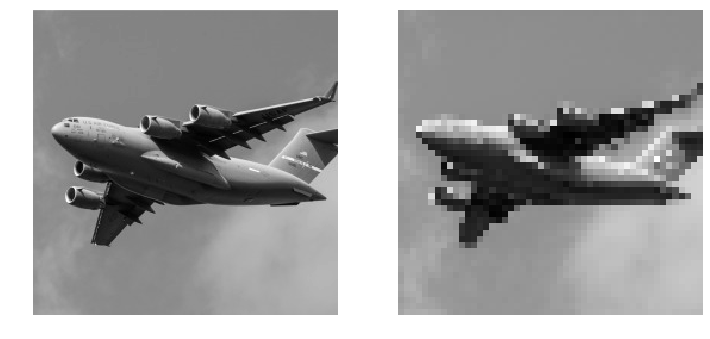

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(my_img, cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(small_img, cmap='gray')
plt.show()

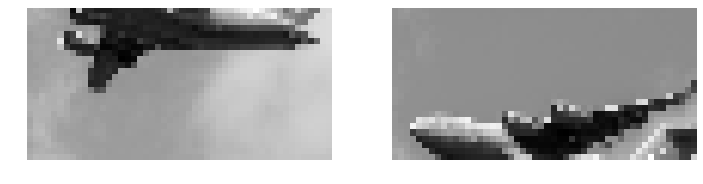

In [22]:
# to crop just select a slice
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(small_img[25:, :], cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(small_img[:25, :], cmap='gray')
plt.show()

### Blurring and Sharpening

In [23]:
plane_path = r"sim_data-master\images\plane_256x256.jpg"
my_img = cv2.imread(plane_path, cv2.IMREAD_GRAYSCALE)
small_img = cv2.blur(my_img, (5, 5))

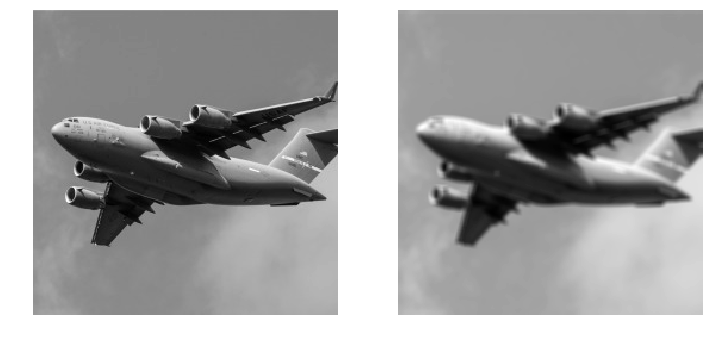

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(my_img, cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(small_img, cmap='gray')
plt.show()

In [33]:
# Custom Kernel
my_kernel = np.array([[1, 1, 1, 1, 1], [1, 2, 2, 2, 1], [1, 2, 3, 2, 1], [1, 2, 2, 2, 1], [1, 1, 1, 1, 1]])
my_kernel = my_kernel / sum([sum(x) for x in my_kernel])
test = cv2.filter2D(my_img, -1, my_kernel)
my_kernel

array([[0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143],
       [0.02857143, 0.05714286, 0.05714286, 0.05714286, 0.02857143],
       [0.02857143, 0.05714286, 0.08571429, 0.05714286, 0.02857143],
       [0.02857143, 0.05714286, 0.05714286, 0.05714286, 0.02857143],
       [0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143]])

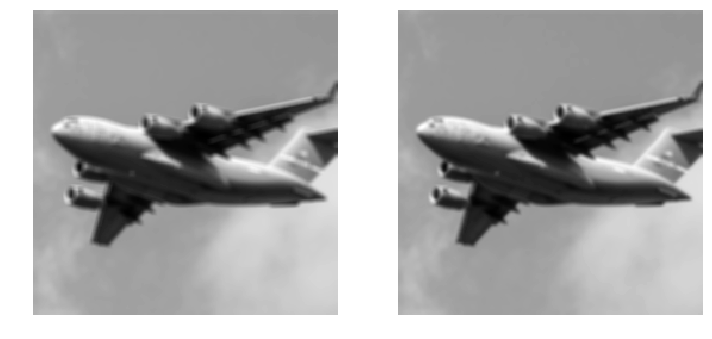

In [34]:
# Sharpened
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(small_img, cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(test, cmap='gray')
plt.show()

- https://setosa.io/ev/image-kernels/
- https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [35]:
# Custom Kernel to sharpen
my_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharp = cv2.filter2D(my_img, -1, my_kernel)
my_kernel

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

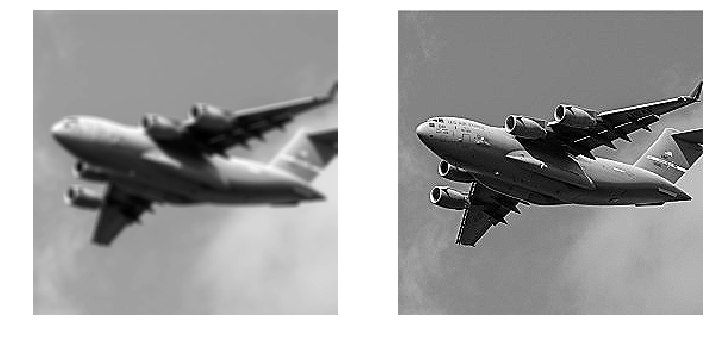

In [36]:
# Sharpened
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(small_img, cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(sharp, cmap='gray')
plt.show()

### Adjust Contrast

In [37]:
plane_path = r"sim_data-master\images\plane_256x256.jpg"
my_img = cv2.imread(plane_path, cv2.IMREAD_GRAYSCALE)
con_img = cv2.equalizeHist(my_img)

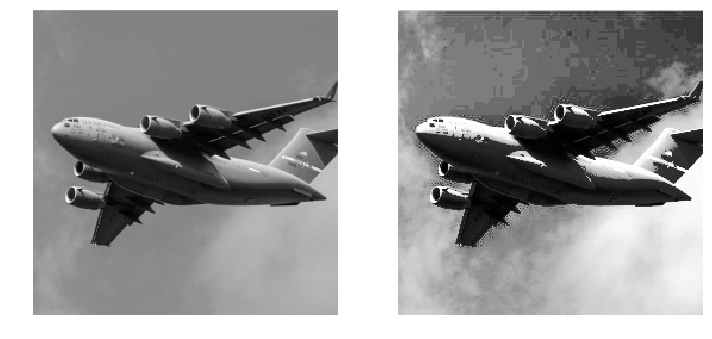

In [38]:
# Sharpened
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(my_img, cmap="gray")
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(con_img, cmap='gray')
plt.show()

In [40]:
# If a color image need to first convert to YUV, y = luma or brightness, and U and V denote the color
plane_path = r"sim_data-master\images\plane.jpg"
my_img = cv2.imread(plane_path)
image_yuv = cv2.cvtColor(my_img, cv2.COLOR_BGR2YUV)
# Apply equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])

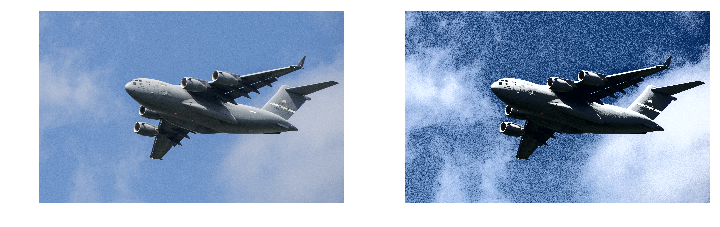

In [42]:
# convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
# Plotting
# Sharpened
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(image_rgb)
plt.show()

### Isolating Colors - Applying a mask

In [43]:
# Define a range of colors and then apply a mask
plane_path = r"sim_data-master\images\plane_256x256.jpg"
my_img = cv2.imread(plane_path)
# BGR TO HSV - Hue, Saturation, and value
image_hsv = cv2.cvtColor(my_img, cv2.COLOR_BGR2HSV)

In [45]:
# define value range
lower_blue = np.array([50, 100, 50])
upper_blue = np.array([130, 255, 255])
my_mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
# Mask Image and convert back
img_mask = cv2.bitwise_and(my_img, my_img, mask=my_mask)
img_mask = cv2.cvtColor(img_mask, cv2.COLOR_BGR2RGB)

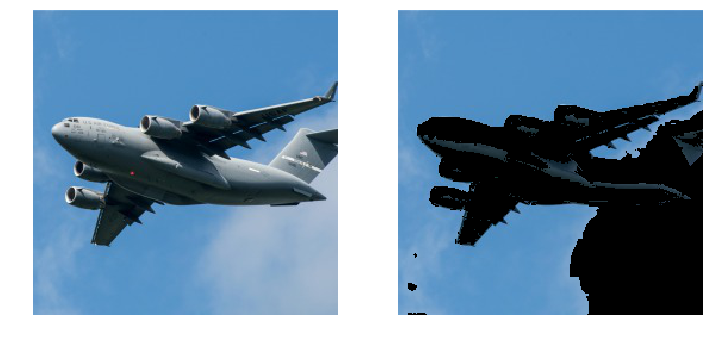

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(img_mask)
plt.show()

### Binarizing Images

In [48]:
plane_path = r"sim_data-master\images\plane_256x256.jpg"
my_img = cv2.imread(plane_path, cv2.IMREAD_GRAYSCALE)
max_output_val = 255
neighbor_size = 99
mean_less = 10
image_bin = cv2.adaptiveThreshold(my_img, max_output_val, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
                                 neighbor_size, mean_less)

- specified the maximum intesity of the output
- set a pixel threshold to be a weighted sum of neighboring pixel intensities (gaussian window)
- benefit of thresholding is denoising an image and isolating important elements

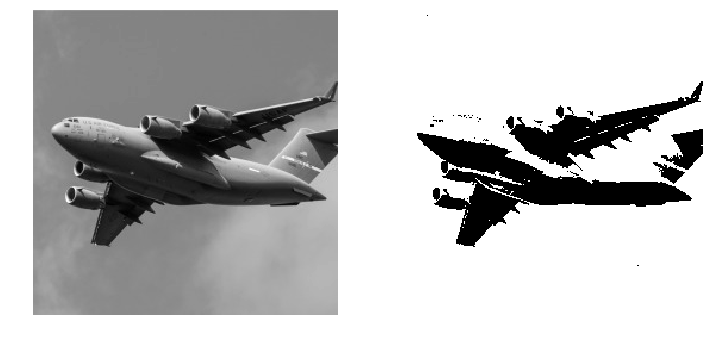

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(my_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(image_bin, cmap='gray')
plt.show()

In [50]:
image_bin = cv2.adaptiveThreshold(my_img, max_output_val, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
                                 5, mean_less)

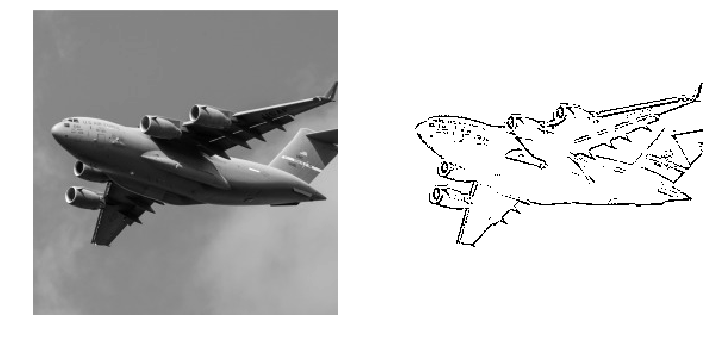

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(my_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(image_bin, cmap='gray')
plt.show()

### Remove background
rectangle that contains the foreground and everything outside of it is assumed to be background.  Uses the presumed background to create a mask that differentiates the fore and background in the rectangle.

In [76]:
# Make a rectangle around teh foreground and run GrabCut algorithm
plane_path = r"sim_data-master\images\plane_256x256.jpg"
my_img = cv2.imread(plane_path)
my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)
# define Rectangle: start x, start y, width, height
my_rect = (0, 56, 256, 150)
# initial Mask
my_mask = np.zeros(my_img.shape[:2], np.uint8)

In [77]:
# Create temporary arrays for background and foreground
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
# Run GrabCut
cv2.grabCut(my_img, my_mask, my_rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
# Create Mask where sure background set to 0 otherwise 1
mask_2 = np.where((my_mask==2) | (my_mask==0), [0], 1).astype('uint8')

In [78]:
mask_2.shape, my_img.shape

((256, 256), (256, 256, 3))

In [79]:
# Multiply image with new mask to subtract background
new_img = my_img * mask_2[:, :, np.newaxis]

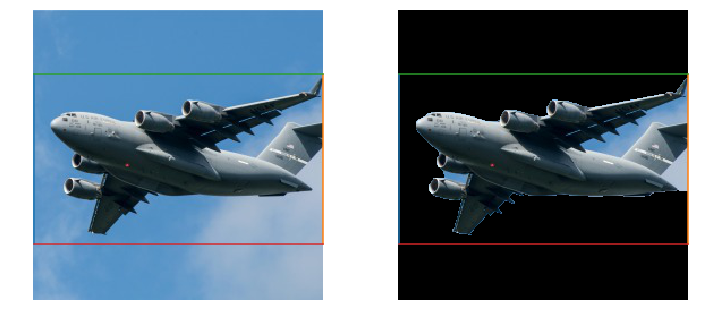

In [80]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(my_img)
plt.plot((0, 0), (56, 206))
plt.plot((256, 256), (56, 206))
plt.plot((0, 256), (56, 56))
plt.plot((0, 256), (206, 206))
plt.subplot(1, 2, 2)
plt.imshow(new_img)
plt.axis("off")
plt.plot((0, 0), (56, 206))
plt.plot((256, 256), (56, 206))
plt.plot((0, 256), (56, 56))
plt.plot((0, 256), (206, 206))
plt.show()

### Edges
- Sobel filters, Laplacian edge detector, Canny Edge Detector
- Canny: Low and High gradient threshold vlaues, those outside the threshold are considered strong edges
- https://en.wikipedia.org/wiki/Canny_edge_detector

In [84]:
plane_path = r"sim_data-master\images\plane_256x256.jpg"
my_img = cv2.imread(plane_path, cv2.IMREAD_GRAYSCALE)
# Calculate Median Intensity
median_intensity = np.median(my_img)
std_intensity = np.std(my_img)
median_intensity, std_intensity

(132.0, 45.91683477898078)

In [85]:
# define one std away
lower_thresh = int(max(0, median_intensity - std_intensity))
upper_thresh = int(min(255, median_intensity + std_intensity))
lower_thresh, upper_thresh

(86, 177)

In [86]:
# Use Canny edge detector
image_canny = cv2.Canny(my_img, lower_thresh, upper_thresh)

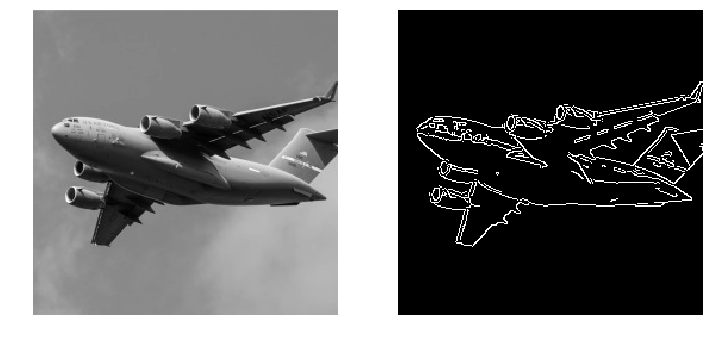

In [87]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(my_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(image_canny, cmap='gray')
plt.show()

### Corner Detection
- Harris and Shi-Tomasi
- https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=goodfeaturestotrack#cornerharris

In [91]:
plane_path = r"sim_data-master\images\plane_256x256.jpg"
bgr_img = cv2.imread(plane_path)
my_img = cv2.imread(plane_path, cv2.IMREAD_GRAYSCALE)a
my_img = np.float32(my_img)

In [92]:
# Set parameters
block_size = 2  # size of neighbor aound each pixel used for detection
aperture = 29  # size of the sorbel kernel used
free_parameter = 0.04  # larger values corresponding to identifying soft corners

In [93]:
# Detect Corners
detector_response = cv2.cornerHarris(my_img, block_size, aperture, free_parameter)
# Large Corner Markers
detector_responses = cv2.dilate(detector_response, None)

In [94]:
# only keep those responses greater than a threshold
threshold = 0.02
bgr_img[detector_responses > (threshold * detector_response.max())] = [255, 255, 255]

In [95]:
# back to gray scale
new_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

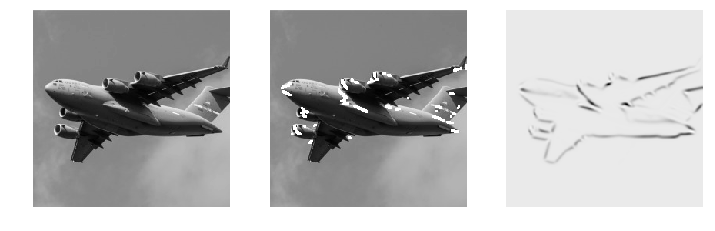

In [97]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(my_img, cmap='gray')
plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(new_img, cmap='gray')
plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(detector_response, cmap='gray')
plt.show()

In [98]:
# Shi-Tomasi
n_corners = 10
min_quality = 0.05
min_dist = 25

In [101]:
# detect corners
corners = cv2.goodFeaturesToTrack(my_img, n_corners, min_quality, min_dist)
corners = np.float32(corners)
# Draw white circle at each corner
for c in corners:
    x, y = c[0]
    cv2.circle(bgr_img, (x, y), 10, (255, 255, 255), -1)
# back to grayscale
new_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

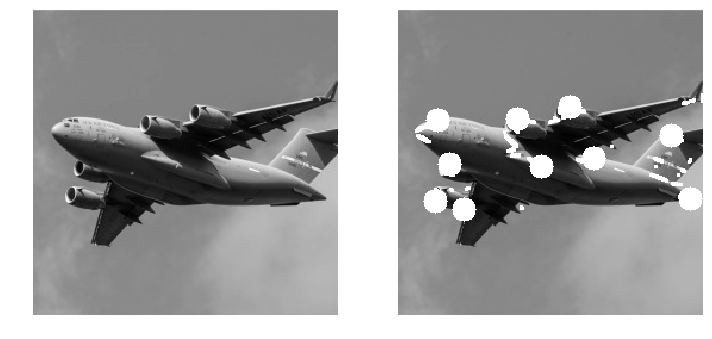

In [103]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(my_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(new_img, cmap='gray')
plt.show()

### Features for Machine Learning

In [104]:
plane_path = r"sim_data-master\images\plane_256x256.jpg"
bgr_img = cv2.imread(plane_path)
my_img = cv2.imread(plane_path, cv2.IMREAD_GRAYSCALE)

In [105]:
# resize and flatten
small_gray = cv2.resize(my_img, (10, 10))
print(small_gray.flatten().shape)
small_bgr = cv2.resize(bgr_img, (10, 10))
print(small_bgr.flatten().shape)

(100,)
(300,)


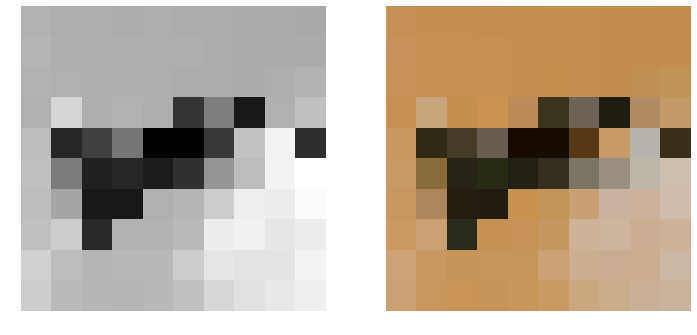

In [106]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(small_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(small_bgr)
plt.show()

### Color as a a Feature
- Mean and Histograms

In [108]:
# Calculate mean of each channel
chan_mean = cv2.mean(bgr_img)
chan_mean

(169.03074645996094, 133.1173553466797, 90.53204345703125, 0.0)

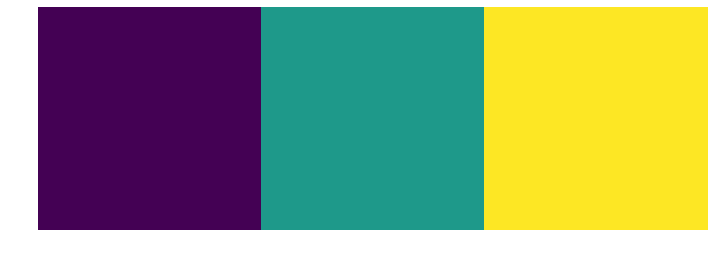

In [112]:
plt.figure(figsize=(12, 6))
plt.axis("off")
plt.imshow(np.array([(chan_mean[2], chan_mean[1], chan_mean[0])]))
plt.show()

In [121]:
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
features = []
colors = ('r', 'g', 'b')

In [122]:
# Create histogram for each channel
# Image, index of channel, Mask, Histogram Size, range
for i, c in enumerate(colors):
    hist = cv2.calcHist([rgb_img], [i], None, [256], [0, 256])
    features.extend(hist)

In [125]:
print(len(features))
obs = np.array(features).flatten()
print(obs.shape, obs[0:5])

768
(768,) [1008.  217.  184.  165.  116.]


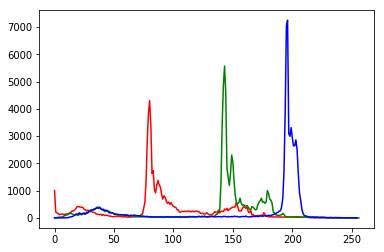

In [128]:
plt.plot(features[:256], c='r')
plt.plot(features[256:513], c='g')
plt.plot(features[513:], c='b')